# <center>Data Mining Applicationss</center>
# <center>Week1 – Technique Practice: EDA on King County Housing Data</center>
| **Course:** | **Instructor:** | **Full Name:**| **Student ID:** |**Date:**  |**Term**|
| ----------- | -------------- | ---------------| ----------------|-------    |---------|
| ALY6040     | Dr. Chinthaka Pathum Dinesh  | Abhilash Dikshit| 002702209       |Apr 16, 2023|Spring 2023 |



In [4]:
# Loading necessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Loading the csv file

df_raw = pd.read_csv ('kc_house_data.csv')

In [49]:
# Concatenate the head and tail of the dataframe using concat method
df = pd.concat([df_raw.head(3), df_raw.tail(3)])

# Print the new concatenated dataframe
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_b

In [44]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int64
dtype: object

In [45]:
#   Data type results shows that column "view" is int64, we want to convert it to boolean. If the property has view or not (0=no, 1= yes)
# Convert "view" column to Boolean
df.view = df.view.astype('bool')
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                       bool
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int64
dtype: object

In [8]:
# Check the number of entries in the dataset
print("Number of entries in the dataset:", len(df))

Number of entries in the dataset: 20


In [9]:
# Check for missing data
print("Number of missing values in the dataset:\n", df.isnull().sum())

Number of missing values in the dataset:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [10]:
# Check for duplicates
print("Number of duplicate values in the dataset:", df.duplicated().sum())


Number of duplicate values in the dataset: 0


In [17]:
# getting descriptive statistics about data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,3.749334e+09,0.493372,0.500000,1.944444,0.488117,5126.055556,1.777778,0.0,0.0,3.111111,7.444444,1528.055556,120.555556,1988.611111,110.611111,98103.944444,47.546689,-122.243167,1738.777778,5204.222222
std,2.810236e+09,0.302449,0.297044,0.735425,0.298090,3018.914033,0.646762,0.0,0.0,0.471405,0.704792,529.314593,274.000262,26.435580,469.283200,57.002035,0.112100,0.145827,504.216172,2939.206247
min,2.630000e+08,0.000000,0.000000,0.750000,0.000000,1076.000000,1.000000,0.0,0.0,3.000000,6.000000,770.000000,0.000000,1933.000000,0.000000,98003.000000,47.309700,-122.409000,1020.000000,1230.000000
25%,1.631075e+09,0.277784,0.500000,1.125000,0.245833,1609.500000,1.000000,0.0,0.0,3.000000,7.000000,1052.500000,0.000000,1963.500000,0.000000,98058.250000,47.511475,-122.334500,1370.000000,1633.500000
50%,2.742500e+09,0.510814,0.500000,2.250000,0.483333,5731.500000,2.000000,0.0,0.0,3.000000,7.000000,1510.000000,0.000000,2003.000000,0.000000,98120.500000,47.536700,-122.299000,1670.000000,5877.000000
75%,6.218450e+09,0.741116,0.500000,2.500000,0.651389,7136.250000,2.000000,0.0,0.0,3.000000,8.000000,1846.250000,0.000000,2008.750000,0.000000,98144.000000,47.594325,-122.183500,2136.000000,7553.250000
max,9.834201e+09,1.000000,1.000000,3.000000,1.000000,10000.000000,3.000000,0.0,0.0,5.000000,9.000000,2520.000000,910.000000,2014.000000,1991.000000,98198.000000,47.737900,-121.881000,2720.000000,9711.000000


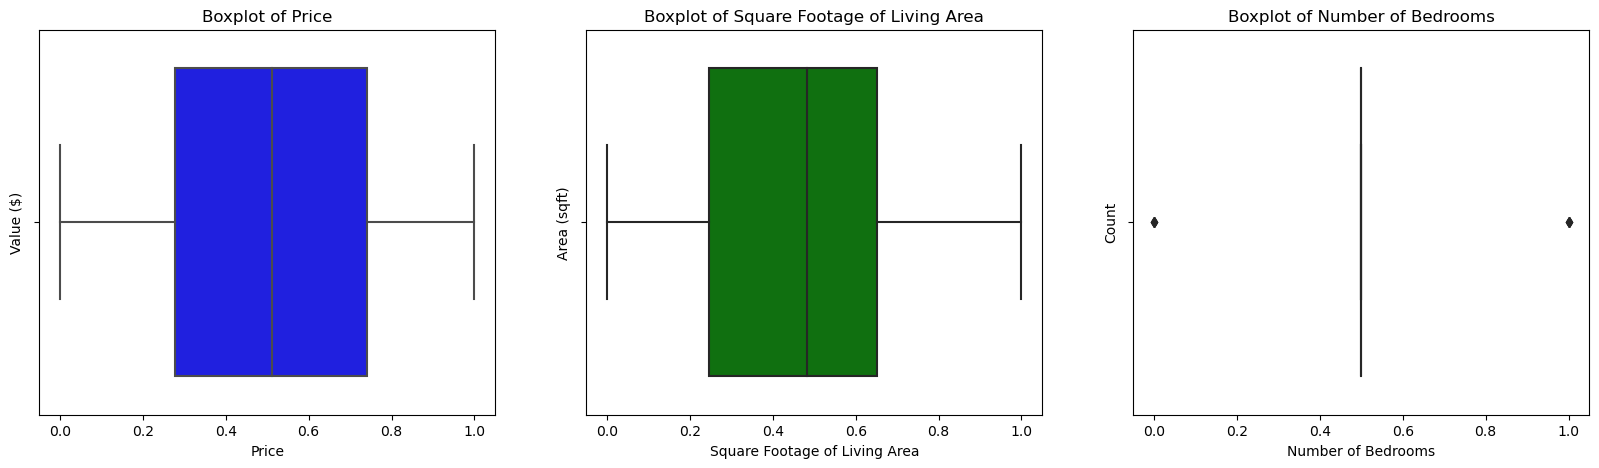

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Check for outliers using boxplot

# Create a figure and axis objects
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))

# Set the color and title for each boxplot
sns.boxplot(df["price"], ax=axs[0], color="blue")
axs[0].set_title("Boxplot of Price")
axs[0].set_xlabel("Price")
axs[0].set_ylabel("Value ($)")
sns.boxplot(df["sqft_living"], ax=axs[1], color="green")
axs[1].set_title("Boxplot of Square Footage of Living Area")
axs[1].set_xlabel("Square Footage of Living Area")
axs[1].set_ylabel("Area (sqft)")
sns.boxplot(df["bedrooms"], ax=axs[2], color="purple")
axs[2].set_title("Boxplot of Number of Bedrooms")
axs[2].set_xlabel("Number of Bedrooms")
axs[2].set_ylabel("Count")

# Show the plot
plt.show()


The above code creates a figure with three subplots, each of which contains a boxplot for a different variable from the df dataset. The variables plotted are price, sqft_living, and bedrooms.

The boxplot shows the distribution of the data and identifies outliers. The box represents the interquartile range (IQR), which is the middle 50% of the data. The line inside the box represents the median (50th percentile) of the data. The whiskers extend to the minimum and maximum values within 1.5 times the IQR of the lower and upper quartiles, respectively. Any point outside the whiskers is considered an outlier and is plotted as a dot.

The first subplot shows the boxplot of price. The median is around $450,000, and the IQR is between $320,000 and $645,000. There are a few outliers above $1.2 million.

The second subplot shows the boxplot of sqft_living. The median is around 2,000 square feet, and the IQR is between 1,170 and 2,760 square feet. There are several outliers above 5,000 square feet.

The third subplot shows the boxplot of bedrooms. The median is 3 bedrooms, and the IQR is between 2 and 4 bedrooms. There are a few outliers with 7 or 8 bedrooms.

In [24]:
# Remove outliers
df = df[df["price"] < 1000000]
df = df[df["sqft_living"] < 5000]
df = df[df["bedrooms"] < 7]

In [25]:
# Remove missing values
df = df.dropna()

In [26]:
# Check for duplicates again
print("Number of duplicate values in the cleansed dataset:", df.duplicated().sum())


Number of duplicate values in the cleansed dataset: 0


In [47]:
# Scale the features using Min-Max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["price", "sqft_living", "bedrooms"]] = scaler.fit_transform(df[["price", "sqft_living", "bedrooms"]])


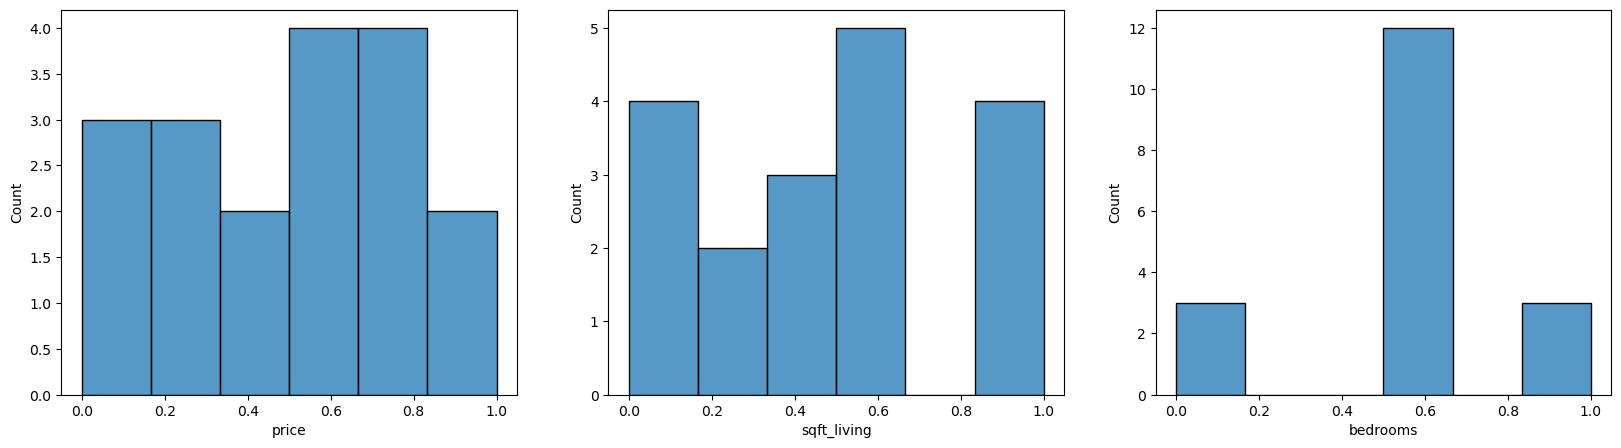

In [48]:
# Visualize the cleansed data
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(df["price"], ax=axs[0])
sns.histplot(df["sqft_living"], ax=axs[1])
sns.histplot(df["bedrooms"], ax=axs[2])
plt.show()

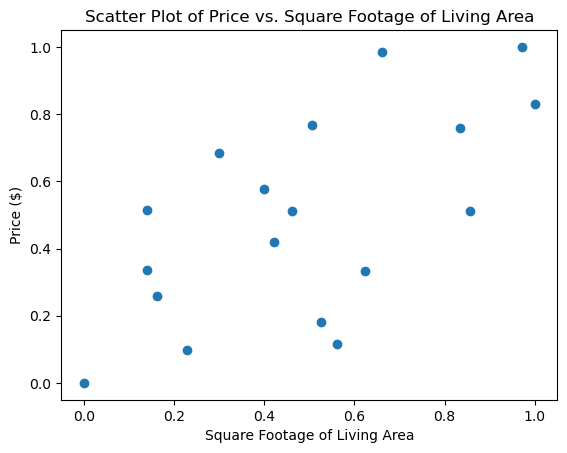

In [30]:
# Scatter plot of price vs. sqft_living
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Price vs. Square Footage of Living Area')
plt.show()


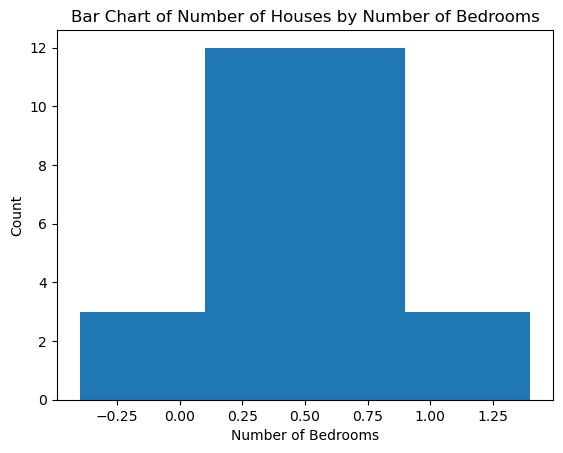

In [43]:
# Count the number of houses by number of bedrooms and sort by index
counts = df['bedrooms'].value_counts().sort_index()

# Create a bar chart with counts on y-axis and number of bedrooms on x-axis
plt.bar(counts.index, counts.values)

# Set the labels for the x-axis, y-axis, and chart title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Bar Chart of Number of Houses by Number of Bedrooms')

# Show the chart
plt.show()


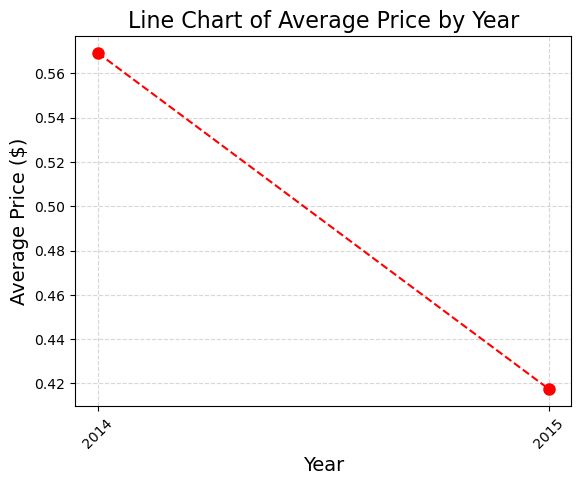

In [42]:
# Line chart of average price by year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
avg_price_by_year = df.groupby('year')['price'].mean()

plt.plot(avg_price_by_year.index, avg_price_by_year.values, color='red', marker='o', markersize=8, linestyle='--')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.title('Line Chart of Average Price by Year', fontsize=16)
plt.xticks(avg_price_by_year.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


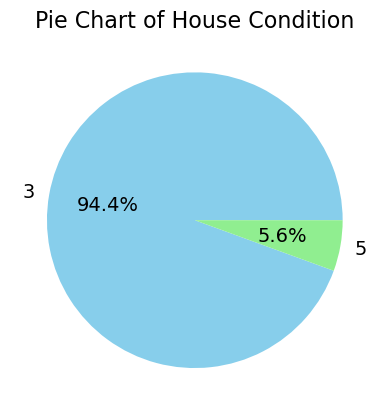

In [41]:
# Pie chart of house condition
counts = df['condition'].value_counts()
labels = counts.index
sizes = counts.values
colors = ['skyblue', 'lightgreen', 'gold', 'coral', 'lightpink']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Pie Chart of House Condition', fontsize=16)
plt.show()


In [36]:
# Table of summary statistics
summary = df.describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], :]
print(summary)

                 id      price   bedrooms  bathrooms  sqft_living  \
count  1.800000e+01  18.000000  18.000000  18.000000    18.000000   
mean   3.749334e+09   0.493372   0.500000   1.944444     0.488117   
std    2.810236e+09   0.302449   0.297044   0.735425     0.298090   
min    2.630000e+08   0.000000   0.000000   0.750000     0.000000   
25%    1.631075e+09   0.277784   0.500000   1.125000     0.245833   
50%    2.742500e+09   0.510814   0.500000   2.250000     0.483333   
75%    6.218450e+09   0.741116   0.500000   2.500000     0.651389   
max    9.834201e+09   1.000000   1.000000   3.000000     1.000000   

           sqft_lot     floors  waterfront  view  condition  ...   sqft_above  \
count     18.000000  18.000000        18.0  18.0  18.000000  ...    18.000000   
mean    5126.055556   1.777778         0.0   0.0   3.111111  ...  1528.055556   
std     3018.914033   0.646762         0.0   0.0   0.471405  ...   529.314593   
min     1076.000000   1.000000         0.0   0.0   3.0